<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Exploratory-Data-Analysis-with-Pandas" data-toc-modified-id="Exploratory-Data-Analysis-with-Pandas-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Exploratory Data Analysis with Pandas</a></span></li><li><span><a href="#Objectives" data-toc-modified-id="Objectives-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Objectives</a></span></li><li><span><a href="#More-Pandas" data-toc-modified-id="More-Pandas-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>More Pandas</a></span><ul class="toc-item"><li><span><a href="#Loading-the-Data" data-toc-modified-id="Loading-the-Data-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Loading the Data</a></span></li></ul></li><li><span><a href="#Exploratory-Data-Analysis-(EDA)" data-toc-modified-id="Exploratory-Data-Analysis-(EDA)-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Exploratory Data Analysis (EDA)</a></span><ul class="toc-item"><li><span><a href="#Inspecting-the-Data" data-toc-modified-id="Inspecting-the-Data-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Inspecting the Data</a></span></li><li><span><a href="#Question-1:-What-animal-types-are-in-the-dataset?" data-toc-modified-id="Question-1:-What-animal-types-are-in-the-dataset?-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Question 1: What animal types are in the dataset?</a></span></li><li><span><a href="#Question-2:-What-&quot;Other&quot;-animals-are-in-the-dataset?" data-toc-modified-id="Question-2:-What-&quot;Other&quot;-animals-are-in-the-dataset?-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Question 2: What "Other" animals are in the dataset?</a></span></li><li><span><a href="#Question-3:-How-old-are-the-animals-in-our-dataset?" data-toc-modified-id="Question-3:-How-old-are-the-animals-in-our-dataset?-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Question 3: How old are the animals in our dataset?</a></span><ul class="toc-item"><li><span><a href="#Series.map()" data-toc-modified-id="Series.map()-4.4.1"><span class="toc-item-num">4.4.1&nbsp;&nbsp;</span><code>Series.map()</code></a></span></li><li><span><a href="#More-Sophisticated-Mapping" data-toc-modified-id="More-Sophisticated-Mapping-4.4.2"><span class="toc-item-num">4.4.2&nbsp;&nbsp;</span>More Sophisticated Mapping</a></span></li><li><span><a href="#Lambda-Functions" data-toc-modified-id="Lambda-Functions-4.4.3"><span class="toc-item-num">4.4.3&nbsp;&nbsp;</span>Lambda Functions</a></span></li></ul></li></ul></li><li><span><a href="#Handling-Missing-Data" data-toc-modified-id="Handling-Missing-Data-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Handling Missing Data</a></span><ul class="toc-item"><li><span><a href="#Fill-with-a-Relevant-Value" data-toc-modified-id="Fill-with-a-Relevant-Value-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Fill with a Relevant Value</a></span></li><li><span><a href="#Fill-with-a-Reasonable-Value" data-toc-modified-id="Fill-with-a-Reasonable-Value-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Fill with a Reasonable Value</a></span></li><li><span><a href="#Specify-That-the-Data-Were-Missing" data-toc-modified-id="Specify-That-the-Data-Were-Missing-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Specify That the Data Were Missing</a></span></li><li><span><a href="#Drop-Missing-Data" data-toc-modified-id="Drop-Missing-Data-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Drop Missing Data</a></span></li><li><span><a href="#Comparing-Before-and-After" data-toc-modified-id="Comparing-Before-and-After-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Comparing Before and After</a></span></li></ul></li></ul></div>

# Exploratory Data Analysis with Pandas

![panda](http://res.freestockphotos.biz/thumbs/3/3173-illustration-of-a-giant-panda-eating-bamboo-th.png)

In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
%matplotlib inline

# Objectives

- Use lambda functions and DataFrame methods to transform data
- Handle missing data

# More Pandas

Suppose you were interested in opening an animal shelter. To inform your planning, it would be useful to analyze data from other shelters to understand their operations. In this lecture, we'll analyze animal outcome data from the Austin Animal Center.  

## Loading the Data

Let's take a moment to examine the [Austin Animal Center data set](https://data.austintexas.gov/Health-and-Community-Services/Austin-Animal-Center-Outcomes/9t4d-g238/data). 

We can also ingest the data right off the web, as we do below. The code below will load JSON data for the last 1000 animals to leave the center from this [JSON file](https://data.austintexas.gov/resource/9t4d-g238.json). 

In [2]:
json_url = 'https://data.austintexas.gov/resource/9t4d-g238.json'
print(json_url)

https://data.austintexas.gov/resource/9t4d-g238.json


In [3]:
json_url = 'https://data.austintexas.gov/resource/9t4d-g238.json'
animals = pd.read_json(json_url)

In [4]:
type(animals)

pandas.core.frame.DataFrame

# Exploratory Data Analysis (EDA)

Exploring a new dataset is essential for understanding what it contains. This will generate ideas for processing the data and questions to try to answer in further analysis.

## Inspecting the Data

Let's take a look at a few rows of data.

In [5]:
animals.head(10)

,animal_id,name,datetime,monthyear,date_of_birth,outcome_type,animal_type,sex_upon_outcome,age_upon_outcome,breed,color,outcome_subtype
0,A794011,Chunk,2019-05-08 18:20:00,2019-05-08T18:20:00.000,2017-05-02T00:00:00.000,Rto-Adopt,Cat,Neutered Male,2 years,Domestic Shorthair Mix,Brown Tabby/White,NaN
1,A776359,Gizmo,2018-07-18 16:02:00,2018-07-18T16:02:00.000,2017-07-12T00:00:00.000,Adoption,Dog,Neutered Male,1 year,Chihuahua Shorthair Mix,White/Brown,NaN
2,A821648,NaN,2020-08-16 11:38:00,2020-08-16T11:38:00.000,2019-08-16T00:00:00.000,Euthanasia,Other,Unknown,1 year,Raccoon,Gray,NaN
3,A720371,Moose,2016-02-13 17:59:00,2016-02-13T17:59:00.000,2015-10-08T00:00:00.000,Adoption,Dog,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff,NaN
4,A674754,NaN,2014-03-18 11:47:00,2014-03-18T11:47:00.000,2014-03-12T00:00:00.000,Transfer,Cat,Intact Male,6 days,Domestic Shorthair Mix,Orange Tabby,Partner
5,A659412,Princess,2020-10-05 14:37:00,2020-10-05T14:37:00.000,2013-03-24T00:00:00.000,Adoption,Dog,Spayed Female,7 years,Chihuahua Shorthair Mix,Brown,NaN
6,A814515,Quentin,2020-05-06 07:59:00,2020-05-06T07:59:00.000,2018-03-01T00:00:00.000,Adoption,Dog,Neutered Male,2 years,American Foxhound/Labrador Retriever,White/Brown,Foster
7,A868405,*Leo,2023-03-04 13:38:00,2023-03-04T13:38:00.000,2020-11-02T00:00:00.000,Adoption,Dog,Neutered Male,2 years,Pit Bull Mix,Brown/White,NaN
8,A689724,*Donatello,2014-10-18 18:52:00,2014-10-18T18:52:00.000,2014-08-01T00:00:00.000,Adoption,Cat,Neutered Male,2 months,Domestic Shorthair Mix,Black,NaN
9,A680969,*Zeus,2014-08-05 16:59:00,2014-08-05T16:59:00.000,2014-06-03T00:00:00.000,Adoption,Cat,Neutered Male,2 months,Domestic Shorthair Mix,White/Orange Tabby,NaN


The `info()` and `describe()` provide a useful overview of the data.

In [6]:
animals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   animal_id         1000 non-null   object        
 1   name              708 non-null    object        
 2   datetime          1000 non-null   datetime64[ns]
 3   monthyear         1000 non-null   object        
 4   date_of_birth     1000 non-null   object        
 5   outcome_type      1000 non-null   object        
 6   animal_type       1000 non-null   object        
 7   sex_upon_outcome  1000 non-null   object        
 8   age_upon_outcome  1000 non-null   object        
 9   breed             1000 non-null   object        
 10  color             1000 non-null   object        
 11  outcome_subtype   474 non-null    object        
dtypes: datetime64[ns](1), object(11)
memory usage: 93.9+ KB


> We can see we have some missing data. Specifically in the `outcome_type`, `outcome_subtype`, and `name` columns.

In [7]:
animals.describe()

C:\Users\macho\AppData\Local\Temp\ipykernel_5388\1370357234.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  animals.describe()


,animal_id,name,datetime,monthyear,date_of_birth,outcome_type,animal_type,sex_upon_outcome,age_upon_outcome,breed,color,outcome_subtype
count,1000,708,1000,1000,1000,1000,1000,1000,1000,1000,1000,474
unique,996,629,996,996,854,7,4,5,40,218,126,13
top,A873909,Coco,2023-03-04 13:09:00,2023-03-04T13:09:00.000,2016-05-01T00:00:00.000,Adoption,Dog,Neutered Male,2 years,Domestic Shorthair Mix,Black/White,Partner
freq,2,4,2,2,5,482,570,354,181,228,94,237
first,NaN,NaN,2013-10-01 17:18:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,2023-03-06 19:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Use value counts to check a categorical feature's distribution

animals['color'].value_counts()

Black/White          94
Black                85
Brown Tabby          61
Brown                42
Brown Tabby/White    35
                     ..
Silver                1
Brown Tabby/Black     1
Brown Merle/White     1
Yellow Brindle        1
Red/Cream             1
Name: color, Length: 126, dtype: int64

Now that we have a sense of the data available to us, we can focus in on some more specific questions to dig into. These questions may or may not be directly relevant to your goal (e.g. helping plan a new shelter), but will always help you gain a better understanding of your data.

In your EDA notebooks, **markdown** will be especially helpful in tracking these questions and your methods of answering the questions.

## Question 1: What animal types are in the dataset?

We can then begin thinking about what parts of the DataFrame we need to answer the question.

* What features do we need?
 - "animal_type"
* What type of logic and calculation do we perform?
 - Let's use `.value_counts()` to count the different animal types
* What type of visualization would help us answer the question?
 - A bar chart would be good for this purpose

In [9]:
animals.columns

Index(['animal_id', 'name', 'datetime', 'monthyear', 'date_of_birth',
       'outcome_type', 'animal_type', 'sex_upon_outcome', 'age_upon_outcome',
       'breed', 'color', 'outcome_subtype'],
      dtype='object')

In [10]:
animals['animal_type'].value_counts()

Dog      570
Cat      374
Other     54
Bird       2
Name: animal_type, dtype: int64

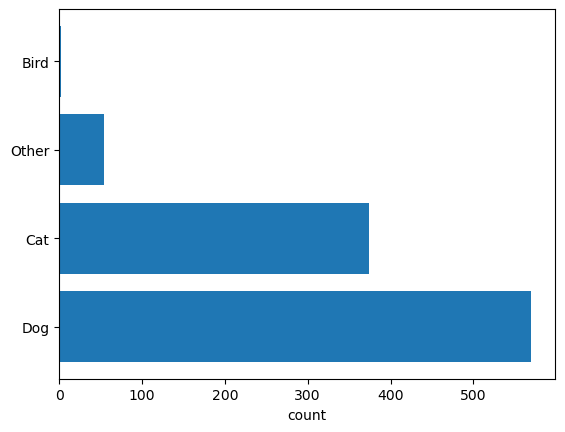

In [11]:
fig, ax = plt.subplots()

animal_type_values = animals['animal_type'].value_counts()

ax.barh(
    y=animal_type_values.index,
    width=animal_type_values.values
)
ax.set_xlabel('count');

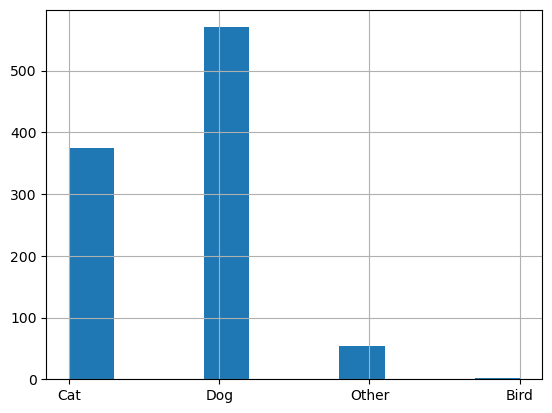

In [12]:
animals['animal_type'].hist();

Questions lead to other questions. For the above example, the visualization raises the question...

## Question 2: What "Other" animals are in the dataset?

To find out, we need to know whether the type of animal for "Other" is in our dataset - and if so, where to find it.   

**Discussion**: Where might we look to find animal types within the Other category?

<details>
    <summary>
        Answer
    </summary>
        The breed column.
</details>

In [13]:
# Your exploration here
animals.head()

,animal_id,name,datetime,monthyear,date_of_birth,outcome_type,animal_type,sex_upon_outcome,age_upon_outcome,breed,color,outcome_subtype
0,A794011,Chunk,2019-05-08 18:20:00,2019-05-08T18:20:00.000,2017-05-02T00:00:00.000,Rto-Adopt,Cat,Neutered Male,2 years,Domestic Shorthair Mix,Brown Tabby/White,NaN
1,A776359,Gizmo,2018-07-18 16:02:00,2018-07-18T16:02:00.000,2017-07-12T00:00:00.000,Adoption,Dog,Neutered Male,1 year,Chihuahua Shorthair Mix,White/Brown,NaN
2,A821648,NaN,2020-08-16 11:38:00,2020-08-16T11:38:00.000,2019-08-16T00:00:00.000,Euthanasia,Other,Unknown,1 year,Raccoon,Gray,NaN
3,A720371,Moose,2016-02-13 17:59:00,2016-02-13T17:59:00.000,2015-10-08T00:00:00.000,Adoption,Dog,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff,NaN
4,A674754,NaN,2014-03-18 11:47:00,2014-03-18T11:47:00.000,2014-03-12T00:00:00.000,Transfer,Cat,Intact Male,6 days,Domestic Shorthair Mix,Orange Tabby,Partner


Let's use that column to answer our question.

In [14]:
mask_other_animals = animals['animal_type'] == 'Other'
animals[mask_other_animals]['breed'].value_counts()

Bat Mix           16
Bat               13
Raccoon Mix        7
Raccoon            5
Guinea Pig Mix     3
Rabbit Sh Mix      2
Guinea Pig         2
Opossum            1
Polish             1
Rabbit Sh          1
Ferret Mix         1
Chinchilla         1
Fox Mix            1
Name: breed, dtype: int64

In [15]:
animals[mask_other_animals]

,animal_id,name,datetime,monthyear,date_of_birth,outcome_type,animal_type,sex_upon_outcome,age_upon_outcome,breed,color,outcome_subtype
2,A821648,NaN,2020-08-16 11:38:00,2020-08-16T11:38:00.000,2019-08-16T00:00:00.000,Euthanasia,Other,Unknown,1 year,Raccoon,Gray,NaN
24,A725795,NaN,2016-05-03 12:39:00,2016-05-03T12:39:00.000,2016-04-15T00:00:00.000,Euthanasia,Other,Unknown,2 weeks,Opossum,Gray,Underage
34,A766700,NaN,2018-02-15 08:59:00,2018-02-15T08:59:00.000,2017-02-15T00:00:00.000,Euthanasia,Other,Unknown,1 year,Bat Mix,Brown,Rabies Risk
40,A765701,NaN,2018-01-25 09:39:00,2018-01-25T09:39:00.000,2017-01-25T00:00:00.000,Euthanasia,Other,Unknown,1 year,Bat Mix,Brown,Rabies Risk
48,A730464,NaN,2016-07-05 12:47:00,2016-07-05T12:47:00.000,2015-07-05T00:00:00.000,Euthanasia,Other,Unknown,1 year,Bat,Black/Brown,Rabies Risk
53,A806497,*Moo,2019-12-17 17:59:00,2019-12-17T17:59:00.000,2019-06-02T00:00:00.000,Adoption,Other,Spayed Female,6 months,Polish,White/White,NaN
63,A757815,NaN,2017-09-07 11:00:00,2017-09-07T11:00:00.000,2015-09-07T00:00:00.000,Euthanasia,Other,Unknown,2 years,Raccoon,Gray/Black,Rabies Risk
82,A734055,NaN,2016-09-01 08:05:00,2016-09-01T08:05:00.000,2015-08-31T00:00:00.000,Euthanasia,Other,Unknown,1 year,Bat Mix,Brown,Rabies Risk
83,A709257,NaN,2015-08-07 08:35:00,2015-08-07T08:35:00.000,2014-08-06T00:00:00.000,Euthanasia,Other,Unknown,1 year,Bat Mix,Black,Rabies Risk
88,A727851,NaN,2016-05-26 18:09:00,2016-05-26T18:09:00.000,2014-05-26T00:00:00.000,Euthanasia,Other,Unknown,2 years,Bat Mix,Brown/Black,Rabies Risk


In [16]:
animals1 = animals.copy()
animals1['OtherType'] = np.where(animals1['breed'].isin(['BatMix','Bat']),'Bat','Non-Bat')
animals1.head()

,animal_id,name,datetime,monthyear,date_of_birth,outcome_type,animal_type,sex_upon_outcome,age_upon_outcome,breed,color,outcome_subtype,OtherType
0,A794011,Chunk,2019-05-08 18:20:00,2019-05-08T18:20:00.000,2017-05-02T00:00:00.000,Rto-Adopt,Cat,Neutered Male,2 years,Domestic Shorthair Mix,Brown Tabby/White,NaN,Non-Bat
1,A776359,Gizmo,2018-07-18 16:02:00,2018-07-18T16:02:00.000,2017-07-12T00:00:00.000,Adoption,Dog,Neutered Male,1 year,Chihuahua Shorthair Mix,White/Brown,NaN,Non-Bat
2,A821648,NaN,2020-08-16 11:38:00,2020-08-16T11:38:00.000,2019-08-16T00:00:00.000,Euthanasia,Other,Unknown,1 year,Raccoon,Gray,NaN,Non-Bat
3,A720371,Moose,2016-02-13 17:59:00,2016-02-13T17:59:00.000,2015-10-08T00:00:00.000,Adoption,Dog,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff,NaN,Non-Bat
4,A674754,NaN,2014-03-18 11:47:00,2014-03-18T11:47:00.000,2014-03-12T00:00:00.000,Transfer,Cat,Intact Male,6 days,Domestic Shorthair Mix,Orange Tabby,Partner,Non-Bat


## Question 3: How old are the animals in our dataset?

Let's try to answer this with the `age_upon_outcome` variable to learn some new `pandas` tools.

In [17]:
animals['age_upon_outcome'].value_counts()

2 years      181
1 year       172
2 months     128
3 years       55
3 months      53
1 month       43
4 years       36
4 months      28
6 years       26
8 years       25
6 months      25
5 months      18
2 weeks       17
7 years       17
5 years       17
9 years       16
10 years      14
9 months      13
4 weeks       13
10 months     13
3 weeks       11
8 months      11
7 months      11
1 weeks        8
12 years       6
11 years       6
1 day          5
6 days         5
15 years       4
2 days         3
13 years       3
1 week         3
0 years        3
5 days         2
11 months      2
16 years       2
3 days         2
4 days         1
14 years       1
5 weeks        1
Name: age_upon_outcome, dtype: int64

### `Series.map()`

The `.map()` method applies a transformation to every entry in the Series. This transformation  "maps" each value from the Series to a new value. A transformation can be defined by a function, Series, or dictionary - usually we'll use functions.

The `.apply()` method is similar to the `.map()` method for Series, but can only use functions. It has more powerful uses when working with DataFrames.

In [21]:
def one_year(age):
    if age == '1 year':
        return '1 years'
    else:
        return age
def one_week(age):
    if age == '1 week':
        return '1 weeks'
    else:
        return age

In [22]:
animals['new_age1'] = animals['age_upon_outcome'].map(one_year)
animals['new_age1'].value_counts()

animals['new_age2'] = animals['new_age1'].map(one_week)
animals['new_age2'].value_counts()

2 years      181
1 years      172
2 months     128
3 years       55
3 months      53
1 month       43
4 years       36
4 months      28
6 years       26
8 years       25
6 months      25
5 months      18
7 years       17
2 weeks       17
5 years       17
9 years       16
10 years      14
10 months     13
4 weeks       13
9 months      13
7 months      11
1 weeks       11
3 weeks       11
8 months      11
12 years       6
11 years       6
6 days         5
1 day          5
15 years       4
2 days         3
13 years       3
0 years        3
3 days         2
5 days         2
11 months      2
16 years       2
4 days         1
14 years       1
5 weeks        1
Name: new_age2, dtype: int64

### More Sophisticated Mapping

Let's use `.map()` to turn sex_upon_outcome into a category with three values (called **ternary**): male, female, or unknown. 

First, explore the unique values:

In [23]:
animals['sex_upon_outcome'].unique()

array(['Neutered Male', 'Unknown', 'Intact Male', 'Spayed Female',
       'Intact Female'], dtype=object)

In [24]:
def sex_mapper(status):
    if status in ['Neutered Male', 'Intact Male']:
        return 'Male'
    elif status in ['Spayed Female', 'Intact Female']:
        return 'Female'
    else:
        return 'Unknown'

In [25]:
animals['new_sex1'] = animals['sex_upon_outcome'].apply(sex_mapper)
animals.loc[:, ['sex_upon_outcome', 'new_sex1']]

,sex_upon_outcome,new_sex1
0,Neutered Male,Male
1,Neutered Male,Male
2,Unknown,Unknown
3,Neutered Male,Male
4,Intact Male,Male
...,...,...
995,Spayed Female,Female
996,Spayed Female,Female
997,Neutered Male,Male
998,Neutered Male,Male


### Lambda Functions

Simple functions can be defined just when you need them, when you would call the function. These are called **lambda functions**. These functions are **anonymous** and disappear immediately after use.

Let's use a lambda function to get rid of 'Other' in the "animal_type' column.

In [26]:
animals[animals['animal_type'] == 'Other']

,animal_id,name,datetime,monthyear,date_of_birth,outcome_type,animal_type,sex_upon_outcome,age_upon_outcome,breed,color,outcome_subtype,new_age1,new_age2,new_sex1
2,A821648,NaN,2020-08-16 11:38:00,2020-08-16T11:38:00.000,2019-08-16T00:00:00.000,Euthanasia,Other,Unknown,1 year,Raccoon,Gray,NaN,1 years,1 years,Unknown
24,A725795,NaN,2016-05-03 12:39:00,2016-05-03T12:39:00.000,2016-04-15T00:00:00.000,Euthanasia,Other,Unknown,2 weeks,Opossum,Gray,Underage,2 weeks,2 weeks,Unknown
34,A766700,NaN,2018-02-15 08:59:00,2018-02-15T08:59:00.000,2017-02-15T00:00:00.000,Euthanasia,Other,Unknown,1 year,Bat Mix,Brown,Rabies Risk,1 years,1 years,Unknown
40,A765701,NaN,2018-01-25 09:39:00,2018-01-25T09:39:00.000,2017-01-25T00:00:00.000,Euthanasia,Other,Unknown,1 year,Bat Mix,Brown,Rabies Risk,1 years,1 years,Unknown
48,A730464,NaN,2016-07-05 12:47:00,2016-07-05T12:47:00.000,2015-07-05T00:00:00.000,Euthanasia,Other,Unknown,1 year,Bat,Black/Brown,Rabies Risk,1 years,1 years,Unknown
53,A806497,*Moo,2019-12-17 17:59:00,2019-12-17T17:59:00.000,2019-06-02T00:00:00.000,Adoption,Other,Spayed Female,6 months,Polish,White/White,NaN,6 months,6 months,Female
63,A757815,NaN,2017-09-07 11:00:00,2017-09-07T11:00:00.000,2015-09-07T00:00:00.000,Euthanasia,Other,Unknown,2 years,Raccoon,Gray/Black,Rabies Risk,2 years,2 years,Unknown
82,A734055,NaN,2016-09-01 08:05:00,2016-09-01T08:05:00.000,2015-08-31T00:00:00.000,Euthanasia,Other,Unknown,1 year,Bat Mix,Brown,Rabies Risk,1 years,1 years,Unknown
83,A709257,NaN,2015-08-07 08:35:00,2015-08-07T08:35:00.000,2014-08-06T00:00:00.000,Euthanasia,Other,Unknown,1 year,Bat Mix,Black,Rabies Risk,1 years,1 years,Unknown
88,A727851,NaN,2016-05-26 18:09:00,2016-05-26T18:09:00.000,2014-05-26T00:00:00.000,Euthanasia,Other,Unknown,2 years,Bat Mix,Brown/Black,Rabies Risk,2 years,2 years,Unknown


In [27]:
animals['animal_type'].value_counts()

Dog      570
Cat      374
Other     54
Bird       2
Name: animal_type, dtype: int64

In [28]:
type(np.nan)

float

In [29]:
animals['animal_type'].map(lambda x: np.nan if x == 'Other' else x).value_counts()

Dog     570
Cat     374
Bird      2
Name: animal_type, dtype: int64

In [30]:
animals['animal_type'].value_counts()

Dog      570
Cat      374
Other     54
Bird       2
Name: animal_type, dtype: int64

In [31]:
#animals['animal_type'] = animals['animal_type'].map(lambda x: np.nan if x == 'Other' else x)

# Handling Missing Data

A lot of the times we'll have missing information in our data set. This can sometimes be troublesome in what we're trying to do.

So far, we've been doing some preprocessing/cleaning to answer questions. Now we're going to handle the missing values in our data.

There are a few strategies we can choose from and they each have their special use case.

> Before making changes, it's convenient to make changes to a copy instead of overwriting data. We'll keep all our changes in `animals_clean` which will be a [copy](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.copy.html) of the original DataFrame.

In [32]:
animals_clean = animals.copy()

## Fill with a Relevant Value

A lot of times we already have an idea of how we want to specify that a value was missing and replace it with a value that makes more sense than an "empty" value.

For example, it might make sense to fill the value as "MISSING" or "UNKNOWN". This way it's clearer when do more analysis.

> We can use Pandas' [`fillna()` method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html) to replace missing values with something specific

In [33]:
# Note this creates a copy of `animals` with the missing values replaced
animals_name_filled = animals_clean.fillna('np.nan') # {col_name:new_value}
animals_name_filled.head(10)

,animal_id,name,datetime,monthyear,date_of_birth,outcome_type,animal_type,sex_upon_outcome,age_upon_outcome,breed,color,outcome_subtype,new_age1,new_age2,new_sex1
0,A794011,Chunk,2019-05-08 18:20:00,2019-05-08T18:20:00.000,2017-05-02T00:00:00.000,Rto-Adopt,Cat,Neutered Male,2 years,Domestic Shorthair Mix,Brown Tabby/White,np.nan,2 years,2 years,Male
1,A776359,Gizmo,2018-07-18 16:02:00,2018-07-18T16:02:00.000,2017-07-12T00:00:00.000,Adoption,Dog,Neutered Male,1 year,Chihuahua Shorthair Mix,White/Brown,np.nan,1 years,1 years,Male
2,A821648,np.nan,2020-08-16 11:38:00,2020-08-16T11:38:00.000,2019-08-16T00:00:00.000,Euthanasia,Other,Unknown,1 year,Raccoon,Gray,np.nan,1 years,1 years,Unknown
3,A720371,Moose,2016-02-13 17:59:00,2016-02-13T17:59:00.000,2015-10-08T00:00:00.000,Adoption,Dog,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff,np.nan,4 months,4 months,Male
4,A674754,np.nan,2014-03-18 11:47:00,2014-03-18T11:47:00.000,2014-03-12T00:00:00.000,Transfer,Cat,Intact Male,6 days,Domestic Shorthair Mix,Orange Tabby,Partner,6 days,6 days,Male
5,A659412,Princess,2020-10-05 14:37:00,2020-10-05T14:37:00.000,2013-03-24T00:00:00.000,Adoption,Dog,Spayed Female,7 years,Chihuahua Shorthair Mix,Brown,np.nan,7 years,7 years,Female
6,A814515,Quentin,2020-05-06 07:59:00,2020-05-06T07:59:00.000,2018-03-01T00:00:00.000,Adoption,Dog,Neutered Male,2 years,American Foxhound/Labrador Retriever,White/Brown,Foster,2 years,2 years,Male
7,A868405,*Leo,2023-03-04 13:38:00,2023-03-04T13:38:00.000,2020-11-02T00:00:00.000,Adoption,Dog,Neutered Male,2 years,Pit Bull Mix,Brown/White,np.nan,2 years,2 years,Male
8,A689724,*Donatello,2014-10-18 18:52:00,2014-10-18T18:52:00.000,2014-08-01T00:00:00.000,Adoption,Cat,Neutered Male,2 months,Domestic Shorthair Mix,Black,np.nan,2 months,2 months,Male
9,A680969,*Zeus,2014-08-05 16:59:00,2014-08-05T16:59:00.000,2014-06-03T00:00:00.000,Adoption,Cat,Neutered Male,2 months,Domestic Shorthair Mix,White/Orange Tabby,np.nan,2 months,2 months,Male


In [34]:
# `animals` DataFrame is left untouched
animals_clean.head()

,animal_id,name,datetime,monthyear,date_of_birth,outcome_type,animal_type,sex_upon_outcome,age_upon_outcome,breed,color,outcome_subtype,new_age1,new_age2,new_sex1
0,A794011,Chunk,2019-05-08 18:20:00,2019-05-08T18:20:00.000,2017-05-02T00:00:00.000,Rto-Adopt,Cat,Neutered Male,2 years,Domestic Shorthair Mix,Brown Tabby/White,NaN,2 years,2 years,Male
1,A776359,Gizmo,2018-07-18 16:02:00,2018-07-18T16:02:00.000,2017-07-12T00:00:00.000,Adoption,Dog,Neutered Male,1 year,Chihuahua Shorthair Mix,White/Brown,NaN,1 years,1 years,Male
2,A821648,NaN,2020-08-16 11:38:00,2020-08-16T11:38:00.000,2019-08-16T00:00:00.000,Euthanasia,Other,Unknown,1 year,Raccoon,Gray,NaN,1 years,1 years,Unknown
3,A720371,Moose,2016-02-13 17:59:00,2016-02-13T17:59:00.000,2015-10-08T00:00:00.000,Adoption,Dog,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff,NaN,4 months,4 months,Male
4,A674754,NaN,2014-03-18 11:47:00,2014-03-18T11:47:00.000,2014-03-12T00:00:00.000,Transfer,Cat,Intact Male,6 days,Domestic Shorthair Mix,Orange Tabby,Partner,6 days,6 days,Male


In [35]:
# Alternative way to fill missing values by specifying column(s) first
animals_only_names = animals[['name']].fillna(value='UNKNOWN')
animals_only_names.head(10)

,name
0,Chunk
1,Gizmo
2,UNKNOWN
3,Moose
4,UNKNOWN
5,Princess
6,Quentin
7,*Leo
8,*Donatello
9,*Zeus


In [36]:
# To keep changes in DataFrame, overwrite the column
animals_clean[['name']] = animals_only_names
animals_clean.head()

,animal_id,name,datetime,monthyear,date_of_birth,outcome_type,animal_type,sex_upon_outcome,age_upon_outcome,breed,color,outcome_subtype,new_age1,new_age2,new_sex1
0,A794011,Chunk,2019-05-08 18:20:00,2019-05-08T18:20:00.000,2017-05-02T00:00:00.000,Rto-Adopt,Cat,Neutered Male,2 years,Domestic Shorthair Mix,Brown Tabby/White,NaN,2 years,2 years,Male
1,A776359,Gizmo,2018-07-18 16:02:00,2018-07-18T16:02:00.000,2017-07-12T00:00:00.000,Adoption,Dog,Neutered Male,1 year,Chihuahua Shorthair Mix,White/Brown,NaN,1 years,1 years,Male
2,A821648,UNKNOWN,2020-08-16 11:38:00,2020-08-16T11:38:00.000,2019-08-16T00:00:00.000,Euthanasia,Other,Unknown,1 year,Raccoon,Gray,NaN,1 years,1 years,Unknown
3,A720371,Moose,2016-02-13 17:59:00,2016-02-13T17:59:00.000,2015-10-08T00:00:00.000,Adoption,Dog,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff,NaN,4 months,4 months,Male
4,A674754,UNKNOWN,2014-03-18 11:47:00,2014-03-18T11:47:00.000,2014-03-12T00:00:00.000,Transfer,Cat,Intact Male,6 days,Domestic Shorthair Mix,Orange Tabby,Partner,6 days,6 days,Male


## Fill with a Reasonable Value

Other times we don't know what the missing value was but we might have a reasonable guess. This allows us to still use the data point (row) in our analysis.

> Beware that filling in missing values can lead to you drawing incorrect conclusions. If most of the data from a column are missing, it's going to appear that the value you filled it in with is more common that it actually was!

A lot of the time we'll use the _mean_ or _median_ for numerical values. Sometimes values like $0$ make sense since it might make sense in the context of how the data was collected.

With categorical values, you might choose to fill the missing values with the most common value (the *mode*).

> Similar to the previous subsection, we can use the `fillna()` method after specifying the value to fill

In [ ]:
## Let's find the most common value for `outcome_subtype`
outcome_subtype_counts = animals['outcome_subtype'].value_counts()
outcome_subtype_counts

In [ ]:
# This gets us just the values in order of most frequent to least frequent
outcome_subtype_ordered = outcome_subtype_counts.index
print(outcome_subtype_ordered)

# Get the first one
most_common_outcome_subtype = outcome_subtype_ordered[0]

In [ ]:
most_common_outcome_subtype

In [ ]:
animals['outcome_subtype'].mode()

In [ ]:
# Using the built-in mode() method
# Note this is Series so we have to get the first element (which is the value)
most_common_outcome_subtype = animals['outcome_subtype'].mode()[0]
most_common_outcome_subtype

In [ ]:
# Similar to the previous subsection, we can use fillna() and update the DF
animals_clean['outcome_subtype'] = animals['outcome_subtype']\
.fillna(most_common_outcome_subtype)
animals_clean.head()

## Specify That the Data Were Missing

Even after filling in missing values, it might make sense to specify that there were missing data. You can document that the data was missing by creating a new column that represents whether the data was originally missing or not.

This can be helpful when you suspect that the fact the data was missing could be important for an analysis.

> Since we already removed some missing values, we're going to reference back to the original `animals` DataFrame. (Good thing we didn't overwrite it! 😉)

In [ ]:
# Let's specify which values were originally missing in "outcome_subtype"
missing_outcome_subtypes = animals['outcome_subtype'].isna()
missing_outcome_subtypes

In [ ]:
# Create new column for missing outcome subtypes matched w/ replaced values
animals_clean['outcome_subtype_missing'] = missing_outcome_subtypes
animals_clean.head()

## Drop Missing Data

You should try to keep as much relevant data as possible, but sometimes the other methods don't make as much sense and it's better to remove or **drop** the missing data.

We typically drop missing data if very little data would be lost and/or trying to fill in the values wouldn't make sense for our use case. For example, if you're trying to predict the outcome based on the other features/columns it might not make sense to fill in those missing values with something you can't confirm.

> We noticed that `outcome_type` had only a few missing values. It might not be worth trying to handle those few missing values. We can pretend that the `outcome_type` was an important feature and without it the rest of the row's data is of little importance to us.
>
> So we'll decide to drop the row if a value from `outcome_type` is missing. We'll use Pandas' [`dropna()` method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html).

In [ ]:
animals_clean['outcome_type'].value_counts().sum()

In [ ]:
# This will drop any row (axis=0) or column (axis=1) that has missing values
animals_clean = animals_clean.dropna(   # Note we're overwriting animals_clean
                                axis=0, # This is the default & will drop rows; axis=1 for cols
                                subset=['outcome_type'] # Specific labels to consider (defaults to all)
)
animals_clean.head()

In [ ]:
animals_clean.shape

## Comparing Before and After

We can now see all the work we did!

In [ ]:
# Original data
animals.info()

In [ ]:
# Missing data cleaned
animals_clean.info()

In [ ]:
animals_clean.reset_index()